Let's import some Python libraries

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
from scipy import stats

In [107]:
Tm_df = pd.read_csv("Tm_200_subset_original.csv")

Look at the top of the data file with .head()

In [108]:
Tm_df.head()

,smiles,Tm,num_atms,dipole,quadrupole
0,CC1=C(C=CC(O)=N1)[N+]([O-])=O,508.15,17,4.473978,23.191697
1,COC1=C(N)C=C(C=C1)C(=O)N(C)C,393.15,28,4.772571,21.767880
2,CC1=CC=C(Cl)C(N)=C1,303.95,17,2.216088,7.920099
3,BrC1(C(=O)C2=CC=CC=C2C1=O)C1=CC=CC=C1,379.15,27,3.919235,21.700726
4,NC1=C(Cl)C=C(Cl)C=C1I,353.15,14,2.157331,4.988358


Check data types and for missing values

In [109]:
Tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      201 non-null    object 
 1   Tm          201 non-null    float64
 2   num_atms    201 non-null    int64  
 3   dipole      201 non-null    float64
 4   quadrupole  201 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.0+ KB


Columns can be accessed in two ways. Either as attributes of the dataframe or similar to a dictionary entry.

In [110]:
Tm_df.smiles.head()

0            CC1=C(C=CC(O)=N1)[N+]([O-])=O
1             COC1=C(N)C=C(C=C1)C(=O)N(C)C
2                      CC1=CC=C(Cl)C(N)=C1
3    BrC1(C(=O)C2=CC=CC=C2C1=O)C1=CC=CC=C1
4                    NC1=C(Cl)C=C(Cl)C=C1I
Name: smiles, dtype: object

In [111]:
Tm_df = Tm_df.drop(index=3)

In [112]:
print(Tm_df.iloc[:,[1,3]])

         Tm    dipole
0    508.15  4.473978
1    393.15  4.772571
2    303.95  2.216088
4    353.15  2.157331
5    477.15  4.871275
..      ...       ...
196  437.15  4.874555
197  391.15  5.228117
198  430.15  3.889375
199  433.15  3.437255
200  395.15  4.158610

[200 rows x 2 columns]


In [113]:
Tm_df["smiles"].head()

0                  CC1=C(C=CC(O)=N1)[N+]([O-])=O
1                   COC1=C(N)C=C(C=C1)C(=O)N(C)C
2                            CC1=CC=C(Cl)C(N)=C1
4                          NC1=C(Cl)C=C(Cl)C=C1I
5    [O-][N+](=O)C=CC1=CC(C=C[N+]([O-])=O)=CC=C1
Name: smiles, dtype: object

Rows can be accessed by index

In [114]:
Tm_df.iloc[0]

smiles        CC1=C(C=CC(O)=N1)[N+]([O-])=O
Tm                                   508.15
num_atms                                 17
dipole                             4.473978
quadrupole                        23.191697
Name: 0, dtype: object

New columns can be mathematical operations of other columns

In [115]:
Tm_df["new_column"] = Tm_df.dipole / Tm_df.quadrupole
Tm_df.head()

,smiles,Tm,num_atms,dipole,quadrupole,new_column
0,CC1=C(C=CC(O)=N1)[N+]([O-])=O,508.15,17,4.473978,23.191697,0.192913
1,COC1=C(N)C=C(C=C1)C(=O)N(C)C,393.15,28,4.772571,21.767880,0.219248
2,CC1=CC=C(Cl)C(N)=C1,303.95,17,2.216088,7.920099,0.279806
4,NC1=C(Cl)C=C(Cl)C=C1I,353.15,14,2.157331,4.988358,0.432473
5,[O-][N+](=O)C=CC1=CC(C=C[N+]([O-])=O)=CC=C1,477.15,24,4.871275,44.863362,0.108580


Filtering can be done with Boolean masks of the dataframe

In [116]:
Tm_df.Tm > 400

0       True
1      False
2      False
4      False
5       True
       ...  
196     True
197    False
198     True
199     True
200    False
Name: Tm, Length: 200, dtype: bool

Plot using the built in Pandas functionality. It is generally better to use matplotlib or Seaborn, but the Pandas plotting is fine for exploratory data analysis.

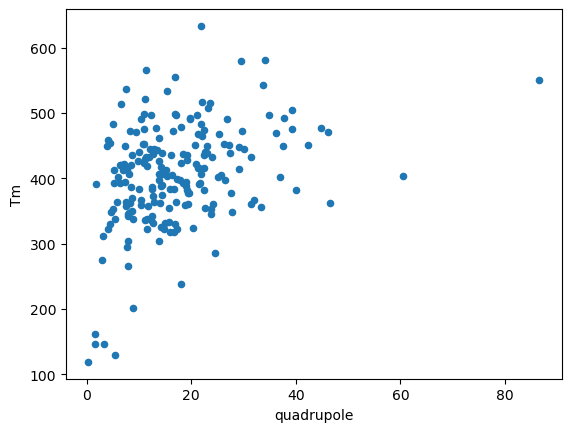

In [117]:
Tm_df.plot.scatter(x="quadrupole", y="Tm");

Screening data according to multiple Boolean conditions

In [118]:
Tm_df[(Tm_df.Tm > 400) & (Tm_df.num_atms < 20) & (Tm_df.dipole > 4)]

,smiles,Tm,num_atms,dipole,quadrupole,new_column
0,CC1=C(C=CC(O)=N1)[N+]([O-])=O,508.15,17,4.473978,23.191697,0.192913
19,NC(=O)C1=CNCCC1,477.15,19,4.806324,13.183506,0.364571
50,NS(=O)(=O)C1=C(Br)C=CC(=C1)[N+]([O-])=O,478.15,19,6.130894,18.045697,0.339743
62,CC1=C(Br)C(Cl)=C(C=N1)C(O)=O,426.15,17,4.160363,13.885092,0.299628
82,NC1=NC2=C(N=CN2)C(=O)N1,633.15,16,6.488483,21.894593,0.296351
95,CC1=NC2=C(N1)C=CN=C2,450.15,17,5.513190,3.831608,1.438871
115,CSC(=O)C1=C2SN=NC2=CC=C1,406.15,19,4.499769,8.209172,0.548139
125,NC1=C(F)C=C(F)C(=C1)C(O)=O,443.15,17,4.504212,13.524745,0.333035


Invert that condition

In [119]:
Tm_df[~(Tm_df.Tm > 400) & (Tm_df.num_atms < 20) & (Tm_df.dipole > 4)]

,smiles,Tm,num_atms,dipole,quadrupole,new_column
27,[O-][N+](=O)C1=NN(CCBr)C=C1,324.15,17,7.529092,20.318932,0.370546
85,COC1=CSC=C1C(N)=O,393.15,17,5.085881,5.187686,0.980376
102,N#CC=CC1=CN=CC=C1,378.15,16,4.346182,27.610626,0.157410
147,CC1=CC=C(C=N1)C#N,358.15,15,4.467646,11.720369,0.381187
151,ClC1=C(C=O)C(=O)OC2=C1C=CC=C2,387.15,19,5.728380,8.455705,0.677457


Write pandas dataframe to a .csv file

In [120]:
Tm_df.to_csv(
    "test_file.csv", index=False
)  # Up to you if you want the index column saved in the output or not
pd.read_csv("test_file.csv").head()  # See the new column get written out

,smiles,Tm,num_atms,dipole,quadrupole,new_column
0,CC1=C(C=CC(O)=N1)[N+]([O-])=O,508.15,17,4.473978,23.191697,0.192913
1,COC1=C(N)C=C(C=C1)C(=O)N(C)C,393.15,28,4.772571,21.767880,0.219248
2,CC1=CC=C(Cl)C(N)=C1,303.95,17,2.216088,7.920099,0.279806
3,NC1=C(Cl)C=C(Cl)C=C1I,353.15,14,2.157331,4.988358,0.432473
4,[O-][N+](=O)C=CC1=CC(C=C[N+]([O-])=O)=CC=C1,477.15,24,4.871275,44.863362,0.108580


Sort dataframes by column

In [121]:
Tm_df.sort_values(
    by="Tm", ascending=False
).head()  # Notice how the index column was shuffled

,smiles,Tm,num_atms,dipole,quadrupole,new_column
82,NC1=NC2=C(N=CN2)C(=O)N1,633.15,16,6.488483,21.894593,0.296351
9,NC1=C(C#N)C(=O)C2CC3=C(CN12)C=CC=C3,581.15,28,9.580572,34.144607,0.280588
188,OC(=O)C1=CC(NC(=O)C2=CC=C(Br)C=C2)=CC=C1,580.15,29,3.733080,29.455901,0.126735
92,O=C1NC(=O)C2=C(S1)C=CC=C2,566.15,17,3.758503,11.301116,0.332578
116,NC1=CC=C(C=C1)C1=CC2=C(O1)C=CC=C2,555.15,27,3.102335,16.948392,0.183046


Compute simple descriptive statistics

In [122]:
# Descriptive Statistics
Tm_df.describe()

,Tm,num_atms,dipole,quadrupole,new_column
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,405.175900,27.115000,3.792793,17.234830,0.281173
std,78.684318,10.248754,2.040079,11.153107,0.209809
min,119.150000,5.000000,0.000000,0.366284,0.000000
25%,360.150000,20.000000,2.387679,9.317734,0.154930
50%,406.650000,25.000000,3.640759,15.104636,0.229042
75%,451.150000,32.000000,5.023602,22.184068,0.332692
max,633.150000,69.000000,10.652692,86.544681,1.438871


Compute specific quantities from columns

In [123]:
Tm_df.Tm.mean()

np.float64(405.17589999999996)

Accessing columns as operable lists in Python

In [124]:
Tm_list = Tm_df.Tm.to_list()
Tm_list[0:5]

[508.15, 393.15, 303.95, 353.15, 477.15]

Pandas can do basic plotting (though it is generally better to use matplotlib, seaborn, or plotly)

Text(0, 0.5, 'Count')

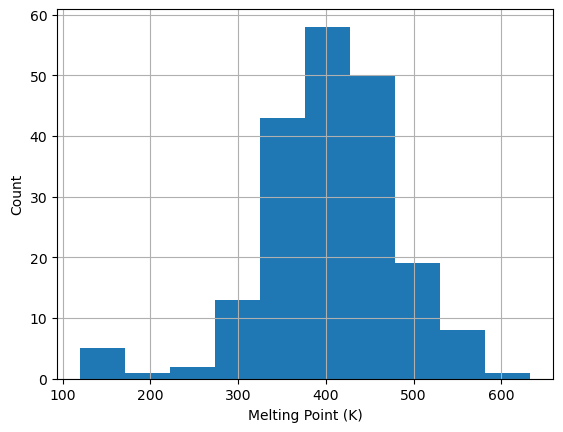

In [125]:
Tm_df.Tm.hist();
plt.xlabel('Melting Point (K)')
plt.ylabel('Count')

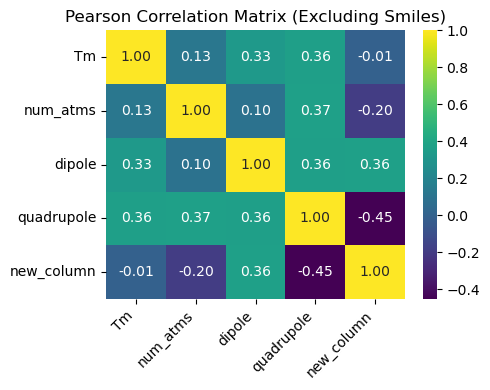

In [126]:
# prompt: Generate Python code using pandas to plot calculate and plot the pearson correlation coefficients of the dataset. Drop the smiles column. Label the x and y axes according to the title of the columns. use a contrasting color scheme

import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'smiles' column
df_for_corr = Tm_df.drop(columns=['smiles'])

# Calculate the Pearson correlation matrix
correlation_matrix = df_for_corr.corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Pearson Correlation Matrix (Excluding Smiles)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

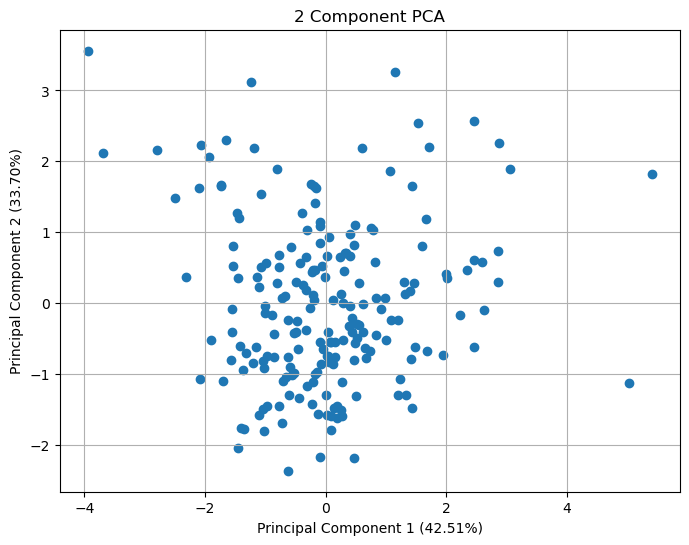

In [127]:
# prompt: Generate code using pandas and scikit-learn to do principal components analysis on all data, excluding the "smiles" and "Tm" data. Plot the first two principal components of the data. Annotate the amount of variance they explain on the axes.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features from the target variable
features = Tm_df.drop(['smiles', 'Tm'], axis=1)

# Standardize the features
x = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'])
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('2 Component PCA')
plt.grid()
plt.show()

Determining "outliers" in your data, but always be cautious!!!

Potential Outliers (based on Z-score > 3):
          smiles      Tm  num_atms    dipole  quadrupole  new_column
12      CCCC(C)C  119.15        20  0.067055    0.366284    0.183069
38   C=CCC1CCCC1  162.15        22  0.357670    1.594611    0.224299
55            CF  130.15         5  1.700645    5.380003    0.316105
87    CCC(CC)C=C  146.15        21  0.386677    1.692360    0.228484
100       CCCOCC  146.15        18  1.164088    3.246000    0.358622


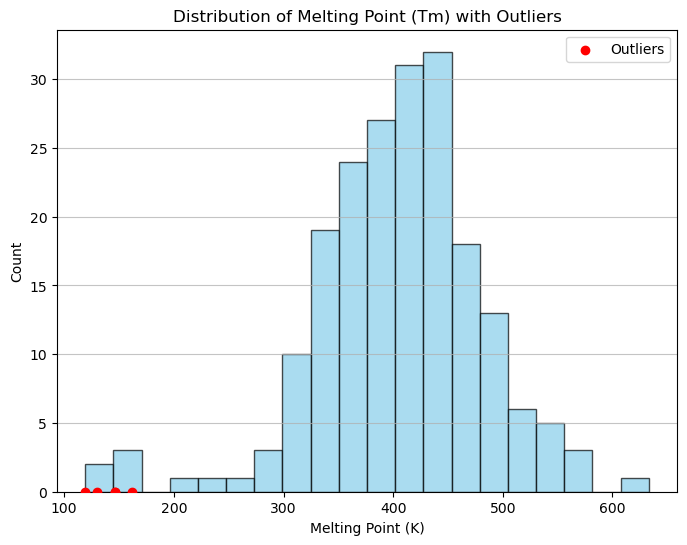

In [128]:
# prompt: Provide code to detect outliers using a z-score applied to the Tm column data. Print what you think the outliers are and plot the outliers on a histogram

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Calculate the Z-scores for the 'Tm' column
z_scores = np.abs(stats.zscore(Tm_df['Tm']))

# Define a threshold for identifying outliers (commonly 3 or -3 for normal distribution)
threshold = 3

# Identify outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Print the potential outliers
print("Potential Outliers (based on Z-score > {}):".format(threshold))
print(Tm_df.iloc[outlier_indices])

# Plot the distribution of 'Tm' and highlight outliers
plt.figure(figsize=(8, 6))
plt.hist(Tm_df['Tm'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.scatter(Tm_df['Tm'].iloc[outlier_indices], np.zeros_like(outlier_indices), color='red', zorder=5, label='Outliers')
plt.xlabel('Melting Point (K)')
plt.ylabel('Count')
plt.title('Distribution of Melting Point (Tm) with Outliers')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

T-test result: TtestResult(statistic=np.float64(-0.4064009056419599), pvalue=np.float64(0.684886964609434), df=np.float64(198.0))
P-value: 0.684886964609434


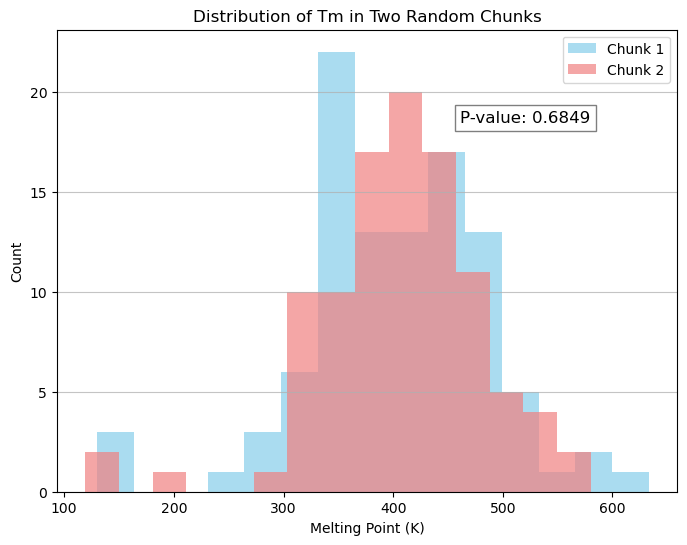

In [129]:
# prompt: Split the Tm data randomly into two separate chunks. Perform a t-test on these two datasets and plot the results, including the p-value

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

# Split the Tm data into two random chunks
tm_chunk1, tm_chunk2 = train_test_split(Tm_df['Tm'], test_size=0.5, random_state=42)

# Perform independent t-test
ttest_result = stats.ttest_ind(tm_chunk1, tm_chunk2)

print(f"T-test result: {ttest_result}")
print(f"P-value: {ttest_result.pvalue}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.hist(tm_chunk1, bins=15, color='skyblue', alpha=0.7, label='Chunk 1')
plt.hist(tm_chunk2, bins=15, color='lightcoral', alpha=0.7, label='Chunk 2')
plt.xlabel('Melting Point (K)')
plt.ylabel('Count')
plt.title('Distribution of Tm in Two Random Chunks')
plt.legend()
plt.text(plt.xlim()[1]*0.7, plt.ylim()[1]*0.8, f'P-value: {ttest_result.pvalue:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.grid(axis='y', alpha=0.75)
plt.show()

Mean Squared Error (MSE): 5363.38
R-squared (R2): 0.13


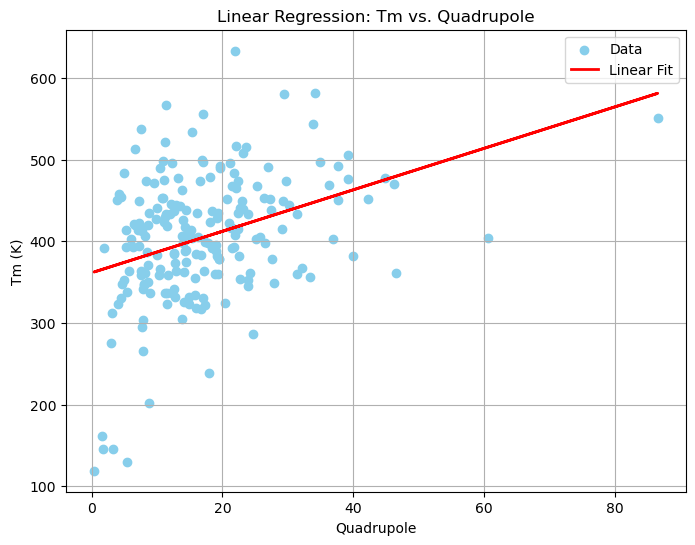

In [130]:
# prompt: use sklearn to do linear regression between quadrupole and Tm. Report MSE and R2 scores and plot data and fit

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract the relevant columns
X = Tm_df[['quadrupole']]  # Feature (independent variable)
y = Tm_df['Tm']          # Target (dependent variable)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the data and the linear fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='skyblue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Fit')
plt.xlabel('Quadrupole')
plt.ylabel('Tm (K)')
plt.title('Linear Regression: Tm vs. Quadrupole')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 5398.02
R-squared (R2): 0.12


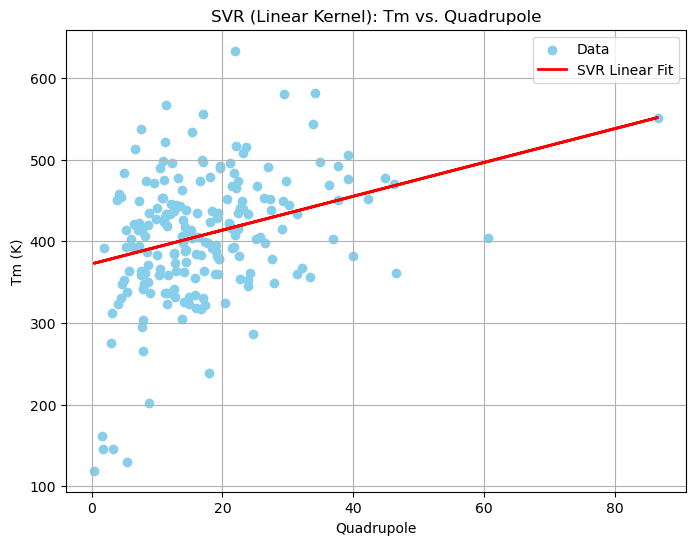

In [131]:
# prompt: rewrite the previous code block to use support vector regression with a linear kernel, instead of linear regression

import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Extract the relevant columns
X = Tm_df[['quadrupole']]  # Feature (independent variable)
y = Tm_df['Tm']          # Target (dependent variable)

# Create an SVR model with a linear kernel
model = SVR(kernel='linear')

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the data and the SVR linear fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='skyblue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='SVR Linear Fit')
plt.xlabel('Quadrupole')
plt.ylabel('Tm (K)')
plt.title('SVR (Linear Kernel): Tm vs. Quadrupole')
plt.legend()
plt.grid(True)
plt.show()
